In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

from scipy.stats import dirichlet

from pycalib.visualisations.ternary import draw_func_contours

# Dirichlet probability density function

$$
p_{dirichlet}(x_1, \dots, x_K| \alpha_1, \dots, \alpha_K) = 
    \frac{1}{\mathrm{B}(\mathbf{\alpha})} \prod_{i=1}^K x_i^{(\alpha_i-1)}
$$

Where the beta function $\mathrm{B}(\cdot)$ is defined from the gamma function $\Gamma(\cdot)$ as:

$$
\mathrm{B}(\mathbf{\alpha}) = \frac{\prod_{i=1}^K \Gamma (\alpha_i)}{\Gamma \left( \sum_{i=1}^K \alpha_i \right)} 
$$

The following are examples of the Gamma and the Beta functions for two variables, but they generalise to more variables

<ipython-input-2-1c5f7b206abe>:10: RuntimeWarning: invalid value encountered in true_divide
  bet = num/den


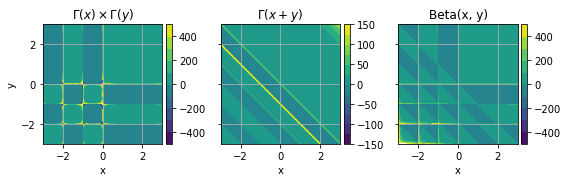

In [2]:
from scipy.special import gamma

from mpl_toolkits.axes_grid1 import make_axes_locatable

X, Y = np.mgrid[-3:3:400j, -3:3:400j]
alphas = np.vstack([X.ravel(), Y.ravel()]).T

num = np.array([np.prod(gamma(a)) for a in alphas])
den = np.array([gamma(sum(a)) for a in alphas])
bet = num/den

num[num < -500] = np.nan
num[num > 500] = np.nan
den[den < -500] = np.nan
den[den > 500] = np.nan
bet[bet < -500] = np.nan
bet[bet > 500] = np.nan
B = bet.reshape(X.shape)

fig = plt.figure(figsize=(8, 3))
for i, z, label in ((1, num, r'$\Gamma(x) \times \Gamma(y)$'),
                    (2, den, r'$\Gamma(x + y)$'),
                    (3, bet, r'Beta(x, y)')):
    ax = fig.add_subplot(1, 3, i)
    ax.set_title(label)
    im = ax.contourf(X, Y, z.reshape(X.shape), levels=10)# , cmap='rainbow')
    ax.set_aspect('equal')
    ax.grid(True)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    #cbar.set_label(label)
    ax.set_xlabel('x')
    if i == 1:
        ax.set_ylabel('y')
    else:
        ax.set_yticklabels([])
fig.tight_layout()
fig.savefig('beta_2d.pdf')

For the Dirichlet distribution, we are only interested in positive alpha values, thus the following is an example of the Beta distribution for those

<ipython-input-3-c925c0ae272d>:13: RuntimeWarning: invalid value encountered in true_divide
  return num/den


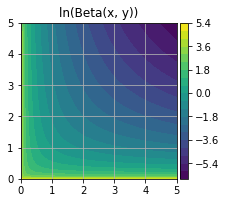

In [3]:
def beta(a_list, epsilon=1e-16):
    '''
    a_list: list or ndarray (n_samples, n_alphas)
    '''
    if isinstance(a_list, list):
        a_list = np.array(a_list)
    if len(a_list.shape) == 1:
        a_list.reshape(1, -1)
    if epsilon is not None:
        a_list = np.clip(a_list, epsilon, None)
    num = np.prod(np.array([gamma(a) for a in a_list]), axis=1)
    den = np.array([gamma(a) for a in np.sum(a_list, axis=1)])
    return num/den


X, Y = np.mgrid[0:5:500j, 0:5:500j]
positions = np.vstack([X.ravel(), Y.ravel()]).T

p = np.array(beta(positions, epsilon=None))

#p[p > 1000] = np.nan
P = p.reshape(X.shape)

fig, ax = plt.subplots(figsize=(3, 3))
im = ax.contourf(X, Y, np.log(P), levels=20)#, cmap='rainbow')
ax.set_aspect('equal')
ax.grid(True)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
ax.set_title('ln(Beta(x, y))')
fig.savefig('beta_2d_0_or_higher.pdf')

In [4]:
beta([[1, 0, 0], [1, 2, 1], [1, 3, 1]])

array([1.00000000e+32, 1.66666667e-01, 8.33333333e-02])

Some examples of the corresponding Dirichlet distributions provided multiple alpha vectors of size 3

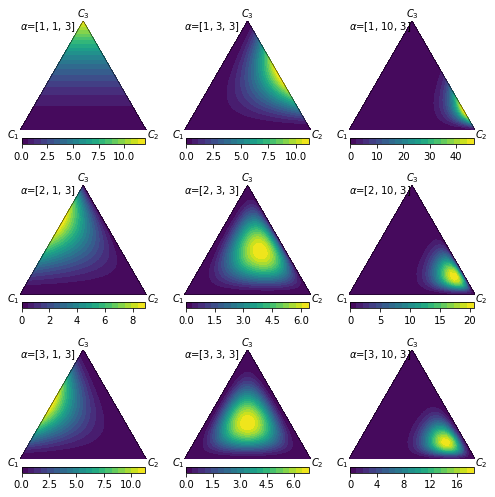

In [5]:
a1_values = [1, 2, 3]
a2_values = [1, 3, 10]
a3 = 3

fig = plt.figure(figsize=(7, 7))
i = 0
for i, a1 in enumerate(a1_values):
    for j, a2 in enumerate(a2_values):
        function = lambda x: dirichlet.pdf(x, alpha=[a1, a2, a3])
        ax = fig.add_subplot(len(a1_values), len(a2_values), i*len(a2_values) + j + 1)
        _ = draw_func_contours(function, nlevels=20, fig=fig, ax=ax)
        ax.annotate(r'$\alpha$' + f'=[{a1}, {a2}, {a3}]', (0, 0.8))
fig.tight_layout()
fig.savefig('dir_dist_examples.pdf')

# Example


We can sample from the Dirichlet distribution

$$
X \sim \mathrm{Dir}(\mathbf{\alpha})
$$

(800, 3)


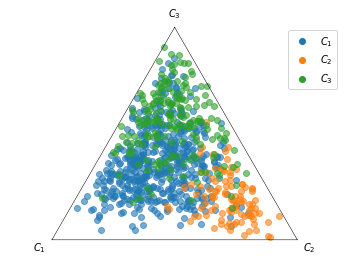

In [6]:
n_list = [500, 100, 200]
#n_list = [100, 100, 100]
pi_list = np.array(n_list)/sum(n_list)
a_list = [[3, 2, 3], [3, 10, 3], [2, 2, 5]]
#a_list = [[3, 1, 1], [1, 2, 1], [1, 1, 2]]


p = np.concatenate([np.random.dirichlet(a, n) for a, n in zip(a_list, n_list)])
print(p.shape)

y = np.concatenate([np.ones(n)*i for i, n in enumerate(n_list)])

from pycalib.visualisations.ternary import draw_tri_samples

fig, ax = draw_tri_samples(p, classes=y, alpha=0.6)

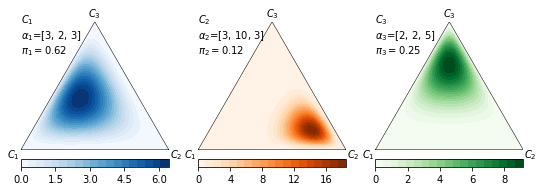

In [7]:
cmap_list = ['Blues', 'Oranges', 'Greens']
fig = plt.figure(figsize=(9, 3))
for c, a in enumerate(a_list):
    ax = fig.add_subplot(1, 3, c+1)
    function = lambda x: dirichlet.pdf(x, alpha=[a[0], a[1], a[2]])
    fig = draw_func_contours(function, nlevels=20, subdiv=5, cmap=cmap_list[c],
                             ax=ax, fig=fig)
    ax.annotate(r'$C_{}$'.format(c+1) + '\n' 
                + r'$\alpha_{}$'.format(c+1) + f'=[{a[0]}, {a[1]}, {a[2]}]' + '\n'
                + r'$\pi_{}={:0.2f}$'.format(c+1, pi_list[c]), (0, 0.65))

fig.savefig('dir_dist_example_likelihood.pdf')

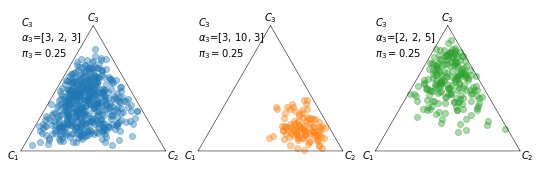

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [8]:
from pycalib.visualisations.ternary import draw_tri_samples

fig = plt.figure(figsize=(9, 3))
for i, (a, n) in enumerate(zip(a_list, n_list)):
    p = np.random.dirichlet(a, n)
    ax = fig.add_subplot(1, 3, i+1)
    draw_tri_samples(p, classes=np.ones(n)*i, alpha=0.4, ax=ax, legend=None)
    ax.annotate(r'$C_{}$'.format(c+1) + '\n' 
                + r'$\alpha_{}$'.format(c+1) + f'=[{a[0]}, {a[1]}, {a[2]}]' + '\n'
                + r'$\pi_{}={:0.2f}$'.format(c+1, pi_list[c]), (0, 0.65))
    fig.savefig('dir_dist_example_samples.pdf')

# Generative definition

In order to derive _Dirichlet calibration_, we will start by assuming that the likelihood of each class comes from a Dirichlet distribution

$$ p_{Dir}(\mathbf{q}|Y=C_i) \sim \text{Dirichlet}(\mathbf{\alpha}_i),
$$

in which each distribution $\text{Dirichlet}_i$ (one per class) is parametrised with a vector of alpha values $\mathbf{\alpha_i} = (\alpha_{i1}, \dots, \alpha_{iK}) \in (0, \infty)^K$. Then, we can combine the likelihoods of a vector per class and their correspoinding prior probabilities $\mathbf{\pi} = (\pi_1 = P(Y=C_1), \dots, \pi_K = P(Y=C_K))$ with the Bayesian theorem to obtain their posteriors

$$
\mu_{DirGen}(\mathbf{q};\mathbf{A}, \mathbf{\pi}) =
\left( \frac{p_{Dir}(\mathbf{q}; \mathbf{\alpha}_1) \pi_1}{p(\mathbf{q})},
\dots,
\frac{p_{Dir}(\mathbf{q}; \mathbf{\alpha}_K) \pi_K}{p(\mathbf{q})} \right),
$$

where the matrix $\mathbf{A} \in (0, \infty)^{K\times K}$ has one row per class $\alpha_i$, $p_{Dir}(\mathbf{q};\mathbf{\alpha}_i)$ is the probability density function of a _Dirichlet distribution_ with parameters $\alpha_i$ evaluated at point $\mathbf{q}$, and $p(\mathbf{q}) = \sum_{i=1}^K p_{Dir}(\mathbf{q}; \mathbf{\alpha}_i) \pi_i$ is a normalisation factor.

We can then estimate the hyperparameters and the class priors as follows

$$\pi_i = \frac{Y_i}{N}$$

<p style="background-color:yellow;">Need to indicate how to find the alphas, and that the priors are biased </p>

In [9]:
class DirichletGenerative():
    def __init__(self):
        self.A = np.array(a_list)
        self.pi = np.array(pi_list)
        
    def predict_proba(self, x):
        pred = np.vstack([dirichlet.pdf(x, alpha=a)*pi for a, pi in zip(self.A, self.pi)]).T
        pred = pred / pred.sum(axis=1)[:, None]
        return pred
    
    def __str__(self):
        return f'Dirichlet Generative\nA = {self.A},\npi = {self.pi}'

dirgen = DirichletGenerative()
cal = dirgen
print(cal)

example_list = ([0.7, 0.2, 0.1], [0.5, 0.3, 0.2])
for example in example_list:
    output = cal.predict_proba(example)
    print(f'Posterior probabilities for example {example} = {output} (sum={output.sum()})')

Dirichlet Generative
A = [[ 3  2  3]
 [ 3 10  3]
 [ 2  2  5]],
pi = [0.625 0.125 0.25 ]
Posterior probabilities for example [0.7, 0.2, 0.1] = [[9.92078130e-01 3.63179962e-04 7.55869051e-03]] (sum=1.0)
Posterior probabilities for example [0.5, 0.3, 0.2] = [[0.95052616 0.00891806 0.04055578]] (sum=0.9999999999999999)


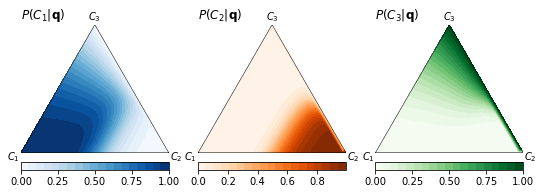

In [10]:
cmap_list = ['Blues', 'Oranges', 'Greens']
fig = plt.figure(figsize=(9, 3))
for c in [0, 1, 2]:
    ax = fig.add_subplot(1, 3, c+1)
    ax.set_title(r'$P(C_{}|'.format(c+1) + r'\mathbf{q})$', loc='left')
    function = lambda x: cal.predict_proba(x.reshape(-1, 1))[0][c]
    fig = draw_func_contours(function, nlevels=20, subdiv=5, cmap=cmap_list[c],
                             ax=ax, fig=fig)
fig.savefig('dir_dist_example_post.pdf')

## Linear implementation

The previous generative implementation may find a good solution if a large amount of data is available. However, we already mentioned that the family of posterior probability functions does not require having _Dirichlet_ likelihood. We can define a _linear_ parametrisation that does not require to infer the original distributions.

We will first we define the softmax function for an elment $x_i$ of the full vector $\mathbf{x} \in (x_1, \dots, x_K)$ as

$$
f_{softmax}(\mathbf{x})_i = \frac{e^{x_i}}{\sum_{i=1}^K e^{x_i}},
$$

and we will abuse the notation by extending the function to a vector form that applies the elementwise softmax

$$
f_{softmax}(\mathbf{x}) = (f_{softmax}(\mathbf{x})_1, \dots, f_{softmax}(\mathbf{x})_K)
$$

In [11]:
def softmax(x, stable=True):
    if isinstance(x, list):
        x = np.array(x)
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    if stable:
        x = x - np.max(x, axis=1).reshape(-1, 1)
    e = np.exp(x)
    z = e.sum(axis=1).reshape(-1, 1)
    return e/z

print(softmax([1, 2, 3]))
print(softmax([[1, 2, 3], [.2, .3, .5]]))

[[0.09003057 0.24472847 0.66524096]]
[[0.09003057 0.24472847 0.66524096]
 [0.28943311 0.31987306 0.39069383]]


Furthermore, notice that if $\mathbf{x}$ only contains positive values it is possible to normalise the vector to sum to one with the previously defined softmax function

$$
f_{softmax}(\mathrm{ln}(\mathbf{x})) =
\frac{e^\mathbf{x}}{\sum_{i=1}^K e^{\mathrm{ln}(x_i)}} =
\frac{\mathbf{x}}{\sum_{i=1}^K x_i}
$$

In [12]:
x = [1, 2, 3]

print(softmax(np.log(x)))
print(x/np.sum(x))

[[0.16666667 0.33333333 0.5       ]]
[0.16666667 0.33333333 0.5       ]


Then, from the previously defined generative implementation we can derive the following

$$\begin{aligned}
\mu_{DirGen}(\mathbf{q};\mathbf{A}, \mathbf{\pi}) &= 
\left( \frac{p_{Dir}(\mathbf{q}; \mathbf{\alpha}_1) \pi_1}{p(\mathbf{q})},
\dots,
\frac{p_{Dir}(\mathbf{q}; \mathbf{\alpha}_k) \pi_k}{p(\mathbf{q})} \right) \\
&=
f_{softmax}\left(
\mathrm{ln}(p_{Dir}(\mathbf{q}; \mathbf{\alpha}_1)\pi_1),
\dots,
\mathrm{ln}(p_{Dir}(\mathbf{q}; \mathbf{\alpha}_K)\pi_K)
\right) \\
&=
f_{softmax}\left(
\mathrm{ln}(p_{Dir}(\mathbf{q}; \mathbf{\alpha}_1)) + \mathrm{ln}(\pi_1),
\dots,
\mathrm{ln}(p_{Dir}(\mathbf{q}; \mathbf{\alpha}_K)) + \mathrm{ln}(\pi_K)
\right) \\
&=
f_{softmax}\left(
\mathrm{ln}\left(\frac{1}{\mathrm{B}(\mathbf{\alpha_1})} \prod_{j=1}^K q_j^{(\alpha_{1j}-1)}\right) + \mathrm{ln}(\pi_1),
\dots,
\mathrm{ln}\left(\frac{1}{\mathrm{B}(\mathbf{\alpha_K})} \prod_{j=1}^K q_j^{(\alpha_{Kj}-1)}\right) + \mathrm{ln}(\pi_K)
\right)
\\
&=
f_{softmax}\left(
\sum_{j=1}^K (\alpha_{1j}-1)\mathrm{ln}(q_j) + \mathrm{ln}(\pi_1) - \mathrm{ln}\left(\mathrm{B}(\mathbf{\alpha_1})\right),
\dots,
\sum_{j=1}^K (\alpha_{Kj}-1)\mathrm{ln}(q_j) + \mathrm{ln}(\pi_1) - \mathrm{ln}\left(\mathrm{B}(\mathbf{\alpha_1})\right)
\right).
\end{aligned}$$

In order to simplify the previous equation we define the following two new variables

$$\begin{aligned}
w_{ij} &= \alpha_{ij} - 1 \\
b_i &= \mathrm{ln}(\pi_i) - \mathrm{ln}(\mathrm{B}(\mathbf{\alpha_i})),
\end{aligned}$$

which results in the following simplification

$$\begin{aligned}
\mu_{DirGen}(\mathbf{q};\mathbf{A}, \mathbf{\pi})
&=
f_{softmax}\left(
\sum_{j=1}^K w_{1j}\mathrm{ln}(q_j) + b_1,
\dots,
\sum_{j=1}^K w_{Kj}\mathrm{ln}(q_j) + b_K
\right).
\end{aligned}
$$

Finally, we can use a vector an matrix notation to finally obtain the linear form

$$
\mu_{DirGen}(\mathbf{q};\mathbf{A}, \mathbf{\pi})
=
f_{softmax}\left(
\mathbf{W}\mathrm{ln}(\mathbf{q}) + \mathbf{b}
\right)
=
\mu_{DirLin}(\mathbf{q};\mathbf{W}, \mathbf{b}).
$$

This linear form is very convenient as it can be solved with a general purpose multivariat logistic regression. Furthermore, it can be added as an additional final layer in a deep neural network (DNN).

In [13]:
W = a_list - np.ones(len(a_list))
b = np.log(pi_list) - np.log(beta(a_list))
print(f'W = {W}')
print(f'ln(pi) = {np.log(pi_list)}')
print(f'ln(B(A)) = {np.log(beta(a_list))}')
print(f'b = {b}')

W = [[2. 1. 2.]
 [2. 9. 2.]
 [1. 1. 4.]]
ln(pi) = [-0.47000363 -2.07944154 -1.38629436]
ln(B(A)) = [ -7.138867   -13.71114954  -7.42654907]
b = [ 6.66886337 11.631708    6.04025471]


In [14]:
class DirichletLinear():
    def __init__(self):
        global a_list
        global pi_list
        if isinstance(a_list, list):
            a_list = np.array(a_list)
        if isinstance(pi_list, list):
            pi_list = np.array(pi_list)
        self.W = a_list - np.ones(len(a_list))
        self.b = np.log(pi_list) - np.log(beta(a_list))
        
    def predict_proba(self, x):
        '''
        Debug
        -----
        print(f'x = {x}')
        print(f'log(x) = {np.log(x)}')
        print(f'W = {self.W}')
        print(f'W*log(x) = {np.dot(self.W, np.log(x))}')
        print(f'b = {self.b}')
        print(f'W*log(x) + b = {z}')
        print(f'softmax(W*log(x) + b) = {softmax(z)}')
        '''
        if isinstance(x, list):
            x = np.array(x)
        if len(x.shape) == 1 or ((len(x.shape) == 2) and (x.shape[1] == 1)):
            x = x.reshape(1, -1)
        z = np.dot(np.log(x), self.W.T) + self.b
        return softmax(z)
    
    def __str__(self):
        return f'Dirichlet Linear\nW = {self.W},\nb = {self.b}'

dirlin = DirichletLinear()
cal = dirlin
print(cal)

for example in example_list:
    output = cal.predict_proba(example)
    print(f'Posterior probabilities for example {example} = {output} (sum={output.sum()})')
    np.testing.assert_allclose(output, dirgen.predict_proba(example))

Dirichlet Linear
W = [[2. 1. 2.]
 [2. 9. 2.]
 [1. 1. 4.]],
b = [ 6.66886337 11.631708    6.04025471]
Posterior probabilities for example [0.7, 0.2, 0.1] = [[9.92078130e-01 3.63179962e-04 7.55869051e-03]] (sum=0.9999999999999999)
Posterior probabilities for example [0.5, 0.3, 0.2] = [[0.95052616 0.00891806 0.04055578]] (sum=1.0)


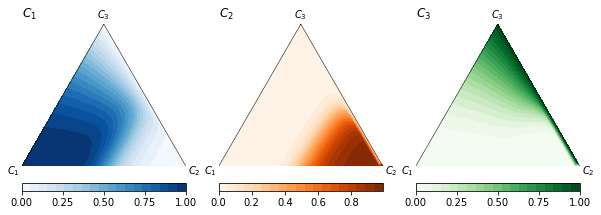

In [15]:
cmap_list = ['Blues', 'Oranges', 'Greens']
fig = plt.figure(figsize=(10, 5))
for c in [0, 1, 2]:
    ax = fig.add_subplot(1, 3, c+1)
    ax.set_title('$C_{}$'.format(c+1), loc='left')
    function = lambda x: cal.predict_proba(x.reshape(-1, 1))[0][c]
    fig = draw_func_contours(function, nlevels=20, subdiv=5, cmap=cmap_list[c],
                             ax=ax, fig=fig)

## Cannonical implementation

The previously defined linear implementation does not require as many samples as the generative implementation. However, the optimal solutions are not unique, as there is an infinite number of parametrisations that are equivalent. For that reason, it can be useful to define a canonical form that has a unique solution.

First, notice that the softmax is not affected by a constant addition to all the elements of a vector $f_{softmax}(\mathbf{x}) = f_{softmax}(\mathbf{x} + c)$

$$\begin{aligned}
\mu_{DirLin}(\mathbf{q};\mathbf{W}, \mathbf{b})
&= f_{softmax}\left(\mathbf{W}\mathbf{ln}(\mathbf{q}) + \mathbf{b} \right) \\
&= f_{softmax}\left(\mathbf{W}\mathbf{ln}(\mathbf{q}) + \mathbf{b} + c_1 + c_2\right) \\
&= f_{softmax}\left(\mathbf{W}\mathbf{ln}(\mathbf{q}) - \mathbf{W}\mathbf{ln}(\mathbf{u}) + c_1
+ \mathbf{W}\mathbf{ln}(\mathbf{u}) + c_2 + \mathbf{b} \right) \\
&= f_{softmax}\left(\mathbf{W}\mathbf{ln}\left(\frac{\mathbf{q}}{\mathbf{u}}\right) + c_1
+ \mathbf{W}\mathbf{ln}(\mathbf{u}) + c_2 + \mathbf{b} \right) 
\end{aligned}
$$

where we have added as well a vector $\mathbf{u} = (1/K, \dots, 1/K) \in (0, 1)^K$.
<p style="background-color:yellow;">Why do we need the vector u to be 1/k? Does any vector work? In my example below I change the vector for other constant values and it seems to work as well.</p>
Now, notice that the elementwise logarithm of a softmax only changes the values of a vector by a constant value

$$
\mathbf{ln}(f_{softmax}(\mathbf{x})) = \mathbf{x} + c_2
$$

which means that 

$$\begin{aligned}
\mu_{DirLin}(\mathbf{q};\mathbf{W}, \mathbf{b})
&= f_{softmax}\left(\mathbf{W}\mathbf{ln}\left(\frac{\mathbf{q}}{\mathbf{u}}\right) + c_1
+ \mathbf{W}\mathbf{ln}(\mathbf{u}) + c_2 + \mathbf{b} \right)  \\
&= f_{softmax}\left(\mathbf{W}\mathbf{ln}\left(\frac{\mathbf{q}}{\mathbf{u}}\right) + c_1
+ \mathbf{ln}(f_{softmax}(\mathbf{W}\mathbf{ln}(\mathbf{u}) + \mathbf{b})) \right).
\end{aligned}
$$

Again, we use the fact that $f_{softmax}(\mathbf{x}) = f_{softmax}(\mathbf{x} + c)$ to extract a constant factor from $\mathbf{W}$

$$
R_{ij} = w_{ij} - \min_{ij} w_{ij} \rightarrow \mathbf{R}\mathbf{q} = \mathbf{Wq} + c_1,
$$

and we also simplify the notation with the following reparametrisation

$$
\mathbf{d} = f_{softmax}(\mathbf{Wlnu} + \mathbf{b})
$$

resulting in

$$
\mu_{DirLin}(\mathbf{q};\mathbf{W}, \mathbf{b})
= f_{softmax}\left(\mathbf{R}\mathbf{ln}\left(\frac{\mathbf{q}}{1/K}\right)
+ \mathbf{ln}(\mathbf{d}) \right)
= \mu_{DirCan}(\mathbf{q}; \mathbf{R}, \mathbf{d}),
$$

where matrix $\mathbf{R} \in [0, \infty)^{K\times K}$ that contains at least one value zero per column, and $\mathbf{d} \in (0, 1)^K$ is a probability vector in a $(K - 1)$-simplex, thus all its elements sum to one $\sum_{i=1}^K d_i = 1$.

<p style="background-color:yellow;">How do we learn the cannonical form? Are there some constraints that we can apply to a multivariate logistic regression? Or is it only theoretical to obtain the cannonical values once we already have the linear model?</p>

In [16]:
class DirichletCannonical(DirichletLinear):
    def __init__(self):
        DirichletLinear.__init__(self)
        self.A = self.W - np.min(W, axis=0)
        self.k = len(self.b)
        # TODO try with self.k = 30
        #self.k = 300
        self.c = softmax(np.dot(np.log(np.ones(len(self.b))/self.k), self.W.T) + self.b)
                                 
    def predict_proba(self, x):
        if isinstance(x, list):
            x = np.array(x)
        if len(x.shape) == 1 or ((len(x.shape) == 2) and (x.shape[1] == 1)):
            x = x.reshape(1, -1)
        z = np.dot(np.log(x*self.k), self.A.T) + np.log(self.c)
        return softmax(z)
    
    def __str__(self):
        return f'Dirichlet Cannonical\nA = {self.A},\nc = {self.c}'

dircan = DirichletCannonical()
cal = dircan
print(cal)

for example in example_list:
    output = cal.predict_proba(example)
    print(f'Posterior probabilities for example {example} = {output} (sum={output.sum()})')
    np.testing.assert_allclose(output, dirgen.predict_proba(example))

Dirichlet Cannonical
A = [[1. 0. 0.]
 [1. 8. 0.]
 [0. 0. 2.]],
c = [[0.8336298  0.01816934 0.14820085]]
Posterior probabilities for example [0.7, 0.2, 0.1] = [[9.92078130e-01 3.63179962e-04 7.55869051e-03]] (sum=0.9999999999999999)
Posterior probabilities for example [0.5, 0.3, 0.2] = [[0.95052616 0.00891806 0.04055578]] (sum=1.0)


In [17]:
print(cal.W)
print(np.min(cal.W, axis=0))

[[2. 1. 2.]
 [2. 9. 2.]
 [1. 1. 4.]]
[1. 1. 2.]


In [18]:
cal.c.sum()

1.0

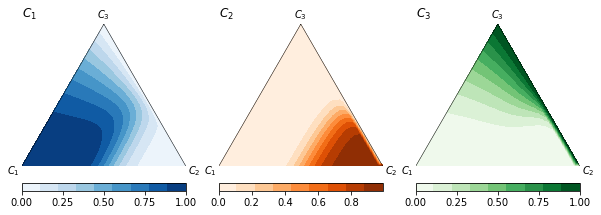

In [19]:
fig = plt.figure(figsize=(10, 5))
for c in [0, 1, 2]:
    ax = fig.add_subplot(1, 3, c+1)
    ax.set_title('$C_{}$'.format(c+1), loc='left')
    function = lambda x: cal.predict_proba(x.reshape(-1, 1))[0][c]
    fig = draw_func_contours(function, nlevels=10, subdiv=5, cmap=cmap_list[c],
                             ax=ax, fig=fig)

In [20]:
x = np.array([3, 2, 1])

c = np.log(softmax(x)) - x

In [21]:
x + c

array([[-0.40760596, -1.40760596, -2.40760596]])

In [22]:
np.log(softmax(x + c))

array([[-0.40760596, -1.40760596, -2.40760596]])

In [23]:
np.dot(np.ones(cal.k)/cal.k, cal.W.T)

array([1.66666667, 4.33333333, 2.        ])

In [24]:
np.log(np.ones(cal.k)/cal.k)

array([-1.09861229, -1.09861229, -1.09861229])